# Site Analysis

This section of the report dives into certain site groupings. These groupings range from examining the limited countryside surveys conducted to a closer look at sections of urban Biel/Bienne.

* Grouping of Madretschkanal and Suze waterways
* Empty lots
* Renaturalization and special maintenance projects
* Rough grouping of types (railroad berms)


In [1]:
# Geographical feature aspect of the surveys


# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

In [ ]:
# insert a nice picture

## Madretschkanal and Suze

These sections of the city have the most overlap in terms of surveys from year 1 and year 2. Both also contain renaturalization sites where money was invested to beautify and provide ecological services. Rivers are often regarded, and ideally also function, as highways for biodiversity and wildlife through urban and periurban spaces. In addition to the river itself, the banks of the river often play host to diverse environments and semi wild plants where insects, fungus and small animals can find refuge and move throughout the urbanized region.


In [3]:
spd.columns

Index(['Unnamed: 0', 'date', 'species', 'year', 'biogeo', 'canton', 'river',
       'lot', 'forest', 'project', 'city', 'rch', 'rmp', 'rju', 'fam', 'res',
       'pri', 'inv', 'ode', 'ns', 'ongen', 'ni', 'cdf', 'biel', 'locname',
       'loc_date', 'genus', 'month'],
      dtype='object')

In [49]:
# filter out all non urban suze observations

spdr = spd.loc[spd.river != "X"]
spdr = spdr.loc[spdr.river != "none"]
spdr = spdr.loc[spdr.river != "neuenburgersee"]
spdr = spdr.loc[spdr.river != "bielersee"]
spdr = spdr.loc[spdr.river != "doubs"]
spdr = spdr.loc[spdr.river != "emme"]
spdr = spdr.loc[spdr.river != "thun"]
spdr = spdr.loc[spdr.river != "thunersee"]
spdr = spdr.loc[spdr.river != "leugene"]
spdr = spdr.loc[spdr.river != "orvine"]
a = spdr.groupby(["river","month"], as_index=False).genus.nunique()
b = spdr.groupby(["river", "inv"], as_index=False).agg({"genus":"nunique","locname":"nunique"})


<AxesSubplot:xlabel='month', ylabel='genus'>

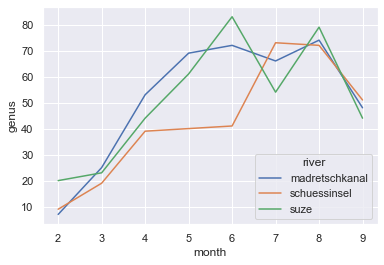

In [50]:
# use seaborne library to plot number of unique species identified in each month 
sns.set_theme(style="darkgrid")

sns.lineplot(x="month", y="genus",hue="river",
             data=a)

In [55]:
c = spdr.groupby(["inv", "rmp","river"]).species.count()
c

inv  rmp  river         
BL   X    madretschkanal     79
          schuessinsel       23
          suze               39
WL   X    madretschkanal      9
          suze                4
X    DD   madretschkanal     30
          schuessinsel       20
          suze               17
     EN   madretschkanal      2
     LC   madretschkanal    947
          schuessinsel      593
          suze              780
     NE   madretschkanal     13
          schuessinsel        8
          suze               11
     NT   madretschkanal     10
          schuessinsel        8
          suze               20
     VU   madretschkanal      2
          suze                1
     X    madretschkanal    186
          schuessinsel      104
          suze              130
Name: species, dtype: int64

In [ ]:
# top species identified in each river region

## Lots

In [44]:
spdlot = spd.loc[spd.lot != "X"]

## Renaturalization

In [45]:
spdre = spd.loc[spd.project != "X"]
a = spdre.groupby("